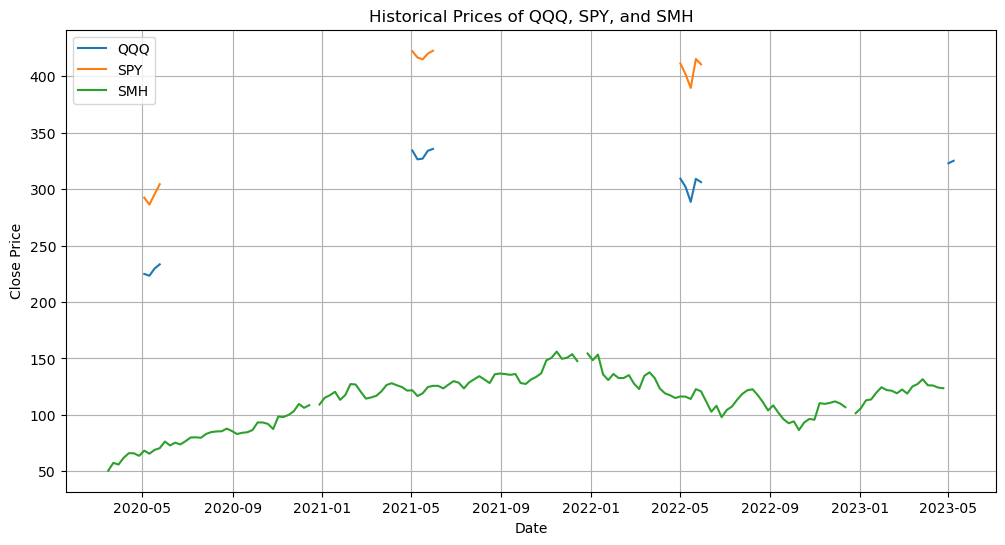

High, Low, and Summary Statistics for QQQ, SPY, and SMH:
      High     Low        Mean   Median  Standard Deviation
QQQ  335.6  223.27  295.717500  309.175           42.534369
SPY  422.6  286.28  381.058667  411.340           54.674073
SMH  156.1   50.53  112.125875  117.370           22.803832


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

file_paths = {
    "QQQ": "CovidQQQ - Sheet1.csv",
    "SPY": "CovidSPY - Sheet1.csv",
    "SMH": "CovidSMH - Sheet1.csv"
}

dataframes = {}
for symbol, path in file_paths.items():
    df = pd.read_csv(path)
    # Convert Date column to datetime
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df.dropna(subset=['Date'], inplace=True)

    # Clean numeric columns
    for col in ['High', 'Low', 'Close']:
        df[col] = df[col].replace({r'[^\d.-]': ''}, regex=True).astype(float)

    # Remove duplicates based on Date
    df.drop_duplicates(subset='Date', keep='first', inplace=True)

    # Sort by Date and set index
    df.sort_values('Date', inplace=True)
    df.set_index('Date', inplace=True)

    # Rename Close column to the symbol
    df.rename(columns={'Close': symbol}, inplace=True)

    dataframes[symbol] = df

# Now we have three DataFrames: dataframes['QQQ'], dataframes['SPY'], dataframes['SMH']
# Each indexed by Date and containing columns: QQQ or SPY or SMH, along with High and Low.

# We'll create a merged DataFrame with just the three close prices
merged_df = pd.concat(
    [dataframes['QQQ']['QQQ'], dataframes['SPY']['SPY'], dataframes['SMH']['SMH']],
    axis=1
)

# Drop duplicates again if any appear after concat (just as a safety net)
merged_df = merged_df[~merged_df.index.duplicated(keep='first')]

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(merged_df.index, merged_df['QQQ'], label='QQQ')
plt.plot(merged_df.index, merged_df['SPY'], label='SPY')
plt.plot(merged_df.index, merged_df['SMH'], label='SMH')
plt.title('Historical Prices of QQQ, SPY, and SMH')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.show()

# Calculate summary statistics
summary_stats = {}
for symbol in ['QQQ', 'SPY', 'SMH']:
    symbol_data = merged_df[symbol].dropna()
    stats = {
        'High': symbol_data.max(),
        'Low': symbol_data.min(),
        'Mean': symbol_data.mean(),
        'Median': symbol_data.median(),
        'Standard Deviation': symbol_data.std()
    }
    summary_stats[symbol] = stats

summary_table = pd.DataFrame(summary_stats).T
print("High, Low, and Summary Statistics for QQQ, SPY, and SMH:")
print(summary_table)
